In [182]:
import glob
import numpy as np
import math
import cv2
from cv2 import aruco
import os
import json

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import pprint as pp

In [183]:
def getVectorFromDic(idx0,idx1):
    return marker_dict[idx0]["tvec"] - marker_dict[idx1]["tvec"]

def getPositionFromDic(idx0):
    return marker_dict[idx0]["tvec"]

# idx0: origin
def getAngleFromDic(idx1,idx0,idx2):
    return getAngle(getVectorFromDic(idx2,idx0),getVectorFromDic(idx1,idx0))

def getDistanceFromDic(idx0,idx1):
     return np.linalg.norm(getVectorFromDic(idx0,idx1))
    
def getJointVec(arr,joint_num):
    return np.array(arr[joint_num*4:joint_num*4+3])

def normalization(vec):
    return vec/np.linalg.norm(vec)

def getSize(vec):
    return np.linalg.norm(vec)

def dotproduct(v1, v2):
    return sum((a*b) for a, b in zip(v1, v2))

def length(v):
    return math.sqrt(dotproduct(v, v))

def getAngle(v1, v2):
    return math.degrees(math.acos(dotproduct(v1, v2) / (length(v1) * length(v2))))

def vec_norm(vec):
    return vec/np.linalg.norm(vec)

def getUpVectorFromRvecs(idx):
    rtx = cv2.Rodrigues(rvecs[idx])[0]
    return rtx.T[2]

# Get Camera Parameters

In [184]:
parameter_dir=r"C:\Users\ZAIO\dev\python_aruco_marker_visualization\camera_parameters"

#load xml file
camera_parameters = {}
# camera_idxs = ["18284509","18284511","18284512"]
camera_idxs = ["18284509"]

parameter_types = ["CameraMatrix","Intrinsics","Distortion"]


for camera_idx in camera_idxs:
    fileToLoad = os.path.join(parameter_dir,camera_idx+".xml")
    fs = cv2.FileStorage(fileToLoad, cv2.FILE_STORAGE_READ)
    _camera_parameter = {}
    for parameter_type in parameter_types:
        _camera_parameter[parameter_type] = fs.getNode(parameter_type).mat()
        camera_parameters[camera_idx] = _camera_parameter

#3d points to image (2nd image)
extri = [0]*3
intri  = [0]*3
dist = [0]*3

for i in range(len(camera_idxs)):
    rotation_matrix = camera_parameters[camera_idxs[i]][parameter_types[0]][:,0:3]
    rvec,_ = cv2.Rodrigues(rotation_matrix)
    tvec = camera_parameters[camera_idxs[i]][parameter_types[0]][:,3]
    
    extri[i] = camera_parameters[camera_idxs[i]][parameter_types[0]]
    intri[i] = camera_parameters[camera_idxs[i]][parameter_types[1]]
    dist[i] = camera_parameters[camera_idxs[i]][parameter_types[2]]
    
camera_index = 0

mtx = camera_parameters[camera_idxs[camera_index]][parameter_types[1]]
dist = camera_parameters[camera_idxs[camera_index]][parameter_types[2]]
pp.pprint(mtx)
pp.pprint(dist)


array([[1.59106837e+03, 0.00000000e+00, 6.34909755e+02],
       [0.00000000e+00, 1.59838858e+03, 5.01707782e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
array([[ 1.36945721e-02],
       [-1.94217874e-01],
       [ 2.42371839e-04],
       [ 6.03200809e-04],
       [-4.39915075e+00],
       [ 3.17459364e-03],
       [-3.13005525e-01],
       [-3.73922900e+00]])


In [185]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250)
length_of_axis = 0.09
markerLength = 0.18


image_data = r"I:\20200730_mutliplearcuo\000000000000_rendered.png"
frame  = cv2.imread(image_data,cv2.IMREAD_UNCHANGED)
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)


frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

rvecs,tvecs, objPts = aruco.estimatePoseSingleMarkers(corners, markerLength , mtx, dist)
imaxis = aruco.drawDetectedMarkers(frame.copy(), corners, ids)


for i in range(len(rvecs)):
    imaxis = aruco.drawAxis(imaxis, mtx, dist, rvecs[i], tvecs[i], length_of_axis)



# Marker data to dictionary
marker_dict = {}

for idx,marker_index in enumerate(ids):
    marker_index = marker_index[0]
    _vecs = {}
    _vecs["rvec"] = rvecs[idx][0]
    _vecs["tvec"] = tvecs[idx][0]
    _vecs["corner"] = corners[idx][0]
    marker_dict[marker_index] = _vecs
print("tvecs and rvecs for each marker\n")
# pp.pprint(marker_dict)



tvecs and rvecs for each marker



In [187]:
# def annotateDistanceFromDic(idx0,idx1):

def getCenterOnImageFromDic(idx):
    return np.average(marker_dict[idx]["corner"],axis = 0)

In [188]:
# def annotateDistanceFromDic(idx0,idx1):

def getCenterOnImageFromDic(idx):
    return np.average(marker_dict[idx]["corner"],axis = 0)


In [189]:
imagefiles = glob.glob(r'I:\20200810_CameraTest\few\selected\*.png')

In [194]:
imagefiles = [r"I:\20200818_ChessboardDetection02\cam01\floor_selected\000000000020_rendered.png"]

In [195]:
import numpy as np
# import cv2, PIL, os
from cv2 import aruco
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

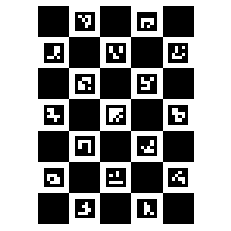

In [196]:
workdir = r"C:\Users\ZAIO\Desktop\Wing"
#Aruco Dictionary
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250)
# create  Charuco board
board = aruco.CharucoBoard_create(5, 7, 0.14, 0.088, aruco_dict)
imboard = board.draw((2000, 2000))
cv2.imwrite(workdir + "chessboard.tiff", imboard)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(imboard, cmap = mpl.cm.gray, interpolation = "nearest")
ax.axis("off")
plt.show()




tvecs and rvecs for each marker



<Figure size 432x288 with 0 Axes>

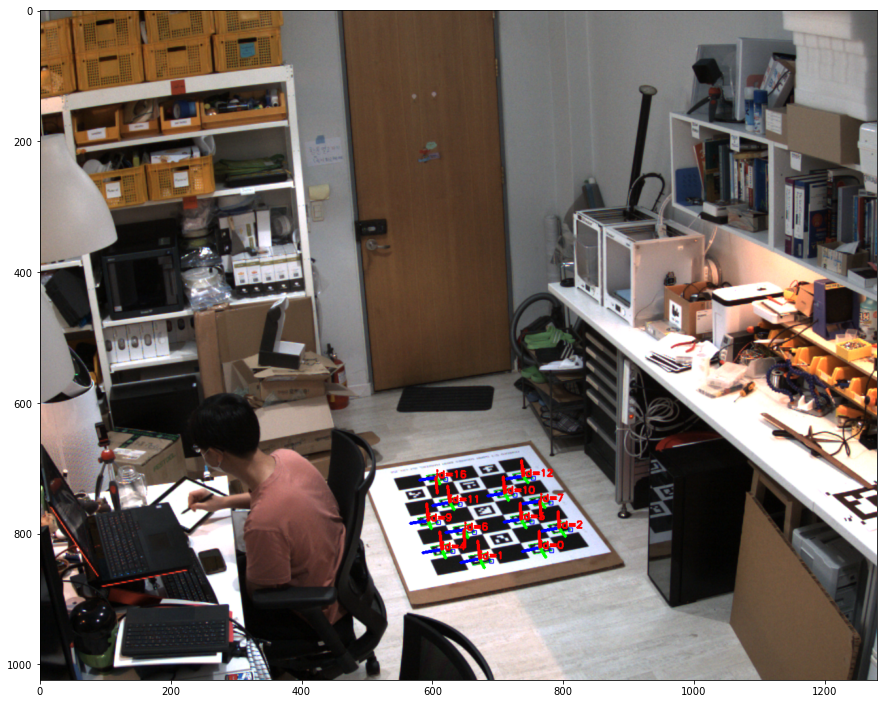

In [202]:
for image_data in imagefiles:
    image_data = image_data

    aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_1000)
    length_of_axis = 0.09
    markerLength = 0.088
    frame  = cv2.imread(image_data,cv2.IMREAD_UNCHANGED)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    parameters =  aruco.DetectorParameters_create()
    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)

    frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

    rvecs,tvecs, objPts = aruco.estimatePoseSingleMarkers(corners, markerLength , mtx, dist)
    imaxis = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

    if(len(rvecs)>0):
        for i in range(len(rvecs)):
            imaxis = aruco.drawAxis(imaxis, mtx, dist, rvecs[i], tvecs[i], length_of_axis)



        # Marker data to dictionary
        marker_dict = {}

        for idx,marker_index in enumerate(ids):
            marker_index = marker_index[0]
            _vecs = {}
            _vecs["rvec"] = rvecs[idx][0]
            _vecs["tvec"] = tvecs[idx][0]
            _vecs["corner"] = corners[idx][0]
            marker_dict[marker_index] = _vecs
        print("tvecs and rvecs for each marker\n")
        # pp.pprint(marker_dict)

        plt.figure()
        plt.figure(figsize=(15,15))

#         for idx0,idx1 in [[0,1],[2,3],[3,4],[5,6],[7,8],[8,9],[10,11],[12,13],[13,14],[15,16],[2,7],[7,12],[4,9],[9,14]]:
#             cen_x, cen_y = np.average([getCenterOnImageFromDic(idx0),getCenterOnImageFromDic(idx1)],axis = 0)
#             distance = getDistanceFromDic(idx0,idx1)
#             text = plt.text(int(cen_x), int(cen_y), "{:.3f}m".format(distance), fontsize=9,color = "red")
#             text.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))

        plt.imshow(imaxis)
        plt.show()

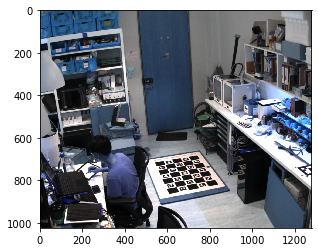

In [208]:
#Post processing
frame = cv2.imread(r"I:\20200818_ChessboardDetection02\cam01\floor_selected\000000000020_rendered.png")
frame = cv2.undistort(src = frame, cameraMatrix = mtx, distCoeffs = dist)
plt.figure()
plt.imshow(frame, interpolation = "nearest")
plt.show()



In [212]:
frame  = cv2.imread(image_data,cv2.IMREAD_UNCHANGED)
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict,
                                                      parameters=parameters)
# SUB PIXEL DETECTION
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.0001)
for corner in corners:
    cv2.cornerSubPix(gray, corner, winSize = (3,3), zeroZone = (-1,-1), criteria = criteria)

frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

corners

[array([[[690.4832 , 843.0625 ],
         [661.76184, 848.4471 ],
         [654.3885 , 834.4364 ],
         [682.4373 , 829.09454]]], dtype=float32),
 array([[[631.38525, 828.3896 ],
         [603.3161 , 833.70013],
         [596.7413 , 820.24115],
         [624.359  , 814.55963]]], dtype=float32),
 array([[[782.7755 , 825.5486 ],
         [754.83765, 830.97327],
         [745.96326, 817.3182 ],
         [773.28925, 811.59625]]], dtype=float32),
 array([[[664.9244 , 797.6818 ],
         [637.9182 , 802.734  ],
         [630.89374, 789.75946],
         [658.     , 785.     ]]], dtype=float32),
 array([[[811.5262 , 794.78546],
         [785.     , 800.     ],
         [775.57666, 786.84827],
         [801.     , 782.     ]]], dtype=float32),
 array([[[609.3169 , 783.79016],
         [582.6081 , 788.8771 ],
         [577.     , 776.     ],
         [602.9692 , 771.0741 ]]], dtype=float32),
 array([[[753.03687, 781.9656 ],
         [726.9658 , 786.7561 ],
         [719.     , 774.     ],
 

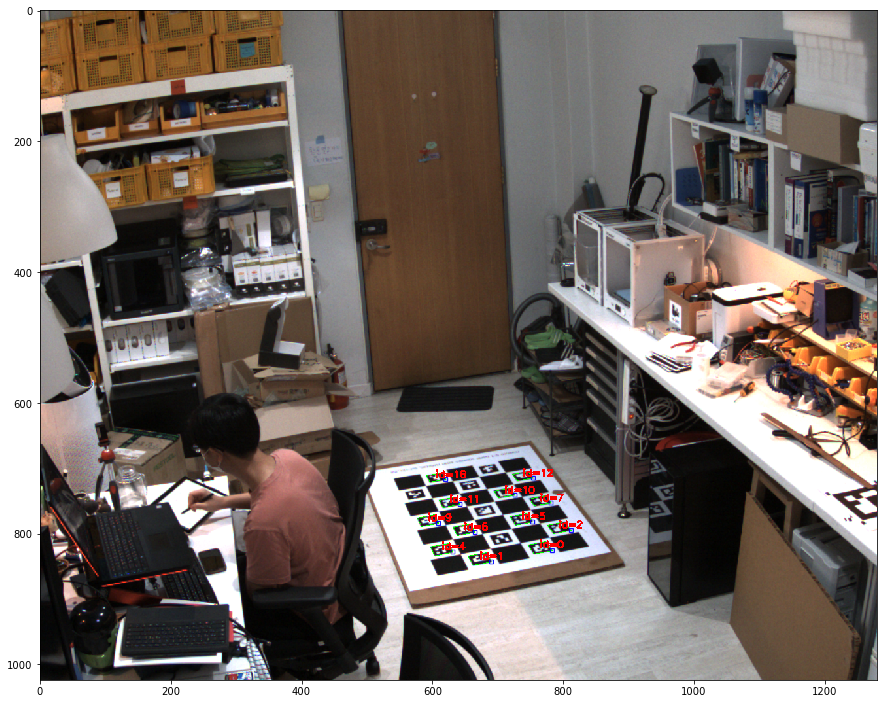

In [213]:
plt.figure(figsize=(15,15))
plt.imshow(frame_markers, interpolation = "nearest")
plt.show()


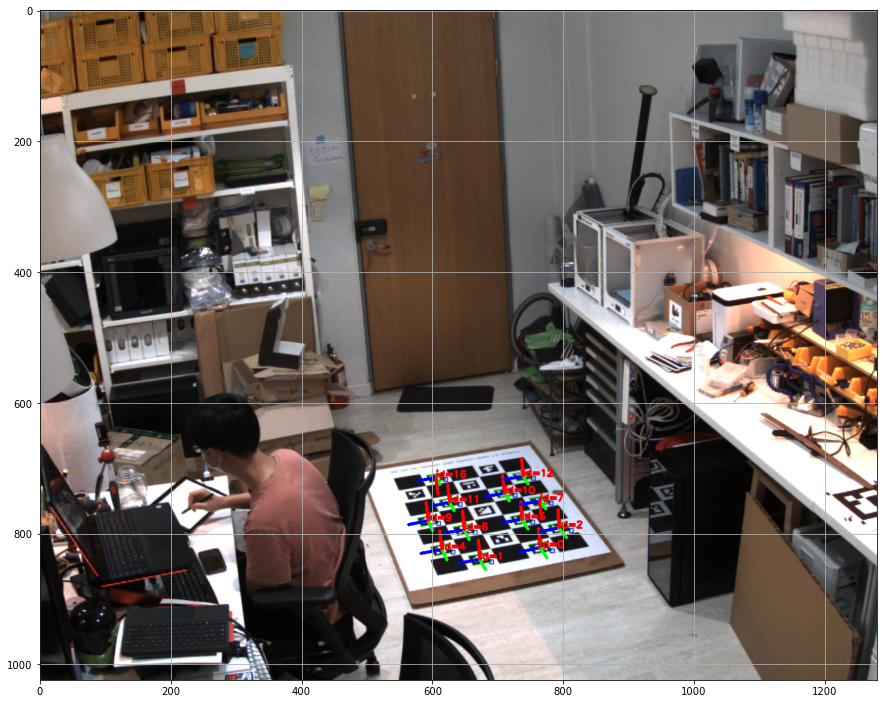

In [214]:
size_of_marker =  0.088 # side lenght of the marker in meter
rvecs,tvecs,objPts = aruco.estimatePoseSingleMarkers(corners, size_of_marker , mtx, dist)
length_of_axis = 0.1
imaxis = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

for i in range(len(tvecs)):
    imaxis = aruco.drawAxis(imaxis, mtx, dist, rvecs[i], tvecs[i], length_of_axis)
plt.figure(figsize=(15,15))
plt.imshow(imaxis)
plt.grid()
plt.show()

In [215]:
data = pd.DataFrame(data = tvecs.reshape(len(tvecs),3), columns = ["tx", "ty", "tz"],
                    index = ids.flatten())
data.index.name = "marker"
data.sort_index(inplace= True)
data


tx        ty        tz
marker                              
0       0.391470  0.963487  4.823291
1       0.111434  1.001858  4.755970
2       0.503235  0.914858  5.061787
4      -0.064283  0.982487  4.873653
5       0.330057  0.900101  5.213066
6       0.040835  0.913868  5.004976
7       0.428755  0.818788  5.278809
9      -0.136329  0.899485  5.171135
10      0.249645  0.783907  5.311870
11     -0.030596  0.829666  5.301587
12      0.353484  0.719544  5.472672
16     -0.104255  0.743270  5.597281

In [216]:
datar = pd.DataFrame(data = tvecs.reshape(len(rvecs),3), columns = ["rx", "ry", "rz"],
                    index = ids.flatten())
datar.index.name = "marker"
datar.sort_index(inplace= True)
np.degrees(datar)

rx         ry          rz
marker                                  
0       22.429597  55.203711  276.354194
1        6.384726  57.402215  272.496998
2       28.833242  52.417498  290.019004
4       -3.683164  56.292381  279.239731
5       18.910890  51.572009  298.686664
6        2.339671  52.360769  286.763987
7       24.565824  46.913071  302.453495
9       -7.811095  51.536676  296.284220
10      14.303597  44.914558  304.347759
11      -1.752995  47.536366  303.758548
12      20.253153  41.226842  313.561029
16      -5.973363  42.586239  320.700580

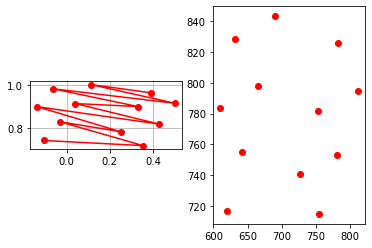

In [217]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(1,2,1)
ax.set_aspect("equal")
plt.plot(data.tx, data.ty, "or-")
plt.grid()
ax = fig.add_subplot(1,2,2)
plt.plot(np.array(corners)[:, 0, 0,0], np.array(corners)[:, 0, 0,1], "or")
plt.show()

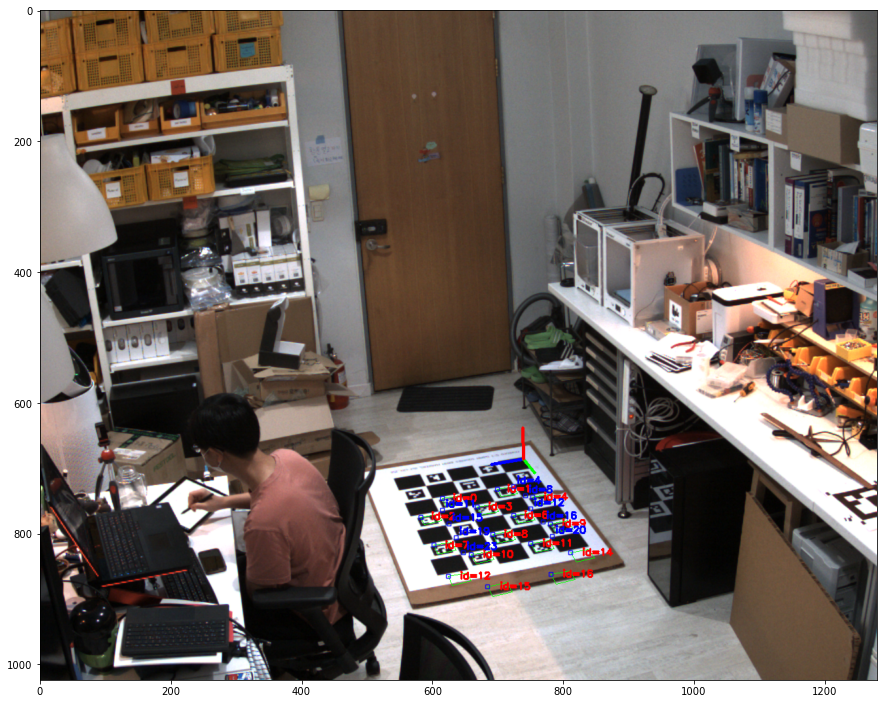

[[ 0.3619588 ]
 [ 2.43209884]
 [-1.77703129]]


In [265]:
#detect Charucoboad with calibration pose
image_data = r"I:\20200818_ChessboardDetection02\cam01\floor_selected\000000000020_rendered.png"
frame  = cv2.imread(image_data,cv2.IMREAD_UNCHANGED)
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

markerCorners, markerIds, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
imaxis = aruco.drawDetectedMarkers(frame.copy(), markerCorners, markerIds)
retval,charucoCorners,charucoIds= cv2.aruco.interpolateCornersCharuco(corners,ids,gray,board)
imaxis_charuco = cv2.aruco.drawDetectedCornersCharuco(imaxis,charucoCorners,charucoIds,(0,0,255))

rvecs, tvecs, _objPoints=cv2.aruco.estimatePoseSingleMarkers(	corners, markerLength, mtx, dist)
retval, rvec, tvec = cv2.aruco.estimatePoseCharucoBoard(charucoCorners, charucoIds, board, mtx, dist,rvecs,tvecs)
imaxis_final= cv2.aruco.drawAxis(imaxis_charuco,mtx, dist, rvec,tvec,length = 0.18)
plt.figure(figsize=(15,15))
plt.imshow(imaxis_charuco)
plt.show()
print(rvec)

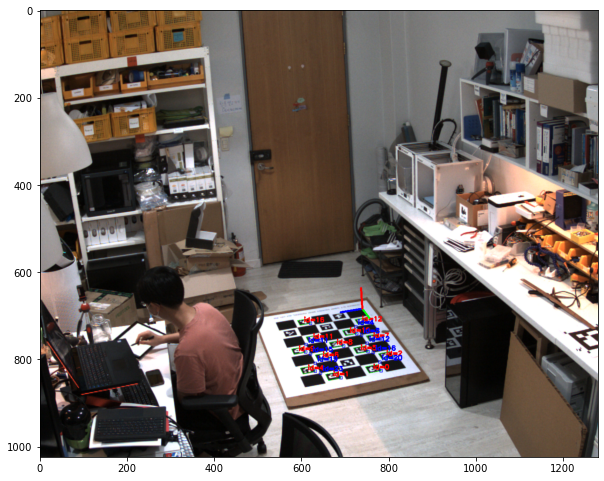

[[ 0.35935642]
 [ 2.45732254]
 [-1.77115142]]


In [232]:
#detect Charucoboad with calibration pose
image_data = r"I:\20200818_ChessboardDetection02\cam01\floor_selected\000000000021_rendered.png"
frame  = cv2.imread(image_data,cv2.IMREAD_UNCHANGED)
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

markerCorners, markerIds, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
imaxis = aruco.drawDetectedMarkers(frame.copy(), markerCorners, markerIds)
retval,charucoCorners,charucoIds= cv2.aruco.interpolateCornersCharuco(corners,ids,gray,board)
imaxis_charuco = cv2.aruco.drawDetectedCornersCharuco(imaxis,charucoCorners,charucoIds,(0,0,255))

rvecs, tvecs, _objPoints=cv2.aruco.estimatePoseSingleMarkers(	corners, markerLength, mtx, dist)
retval, rvec, tvec = cv2.aruco.estimatePoseCharucoBoard(charucoCorners, charucoIds, board, mtx, dist,rvecs,tvecs)
imaxis_final= cv2.aruco.drawAxis(imaxis_charuco,mtx, dist, rvec,tvec,length = 0.18)

plt.figure(figsize=(10,10))
plt.imshow(imaxis_charuco)
plt.show()
print(rvec)

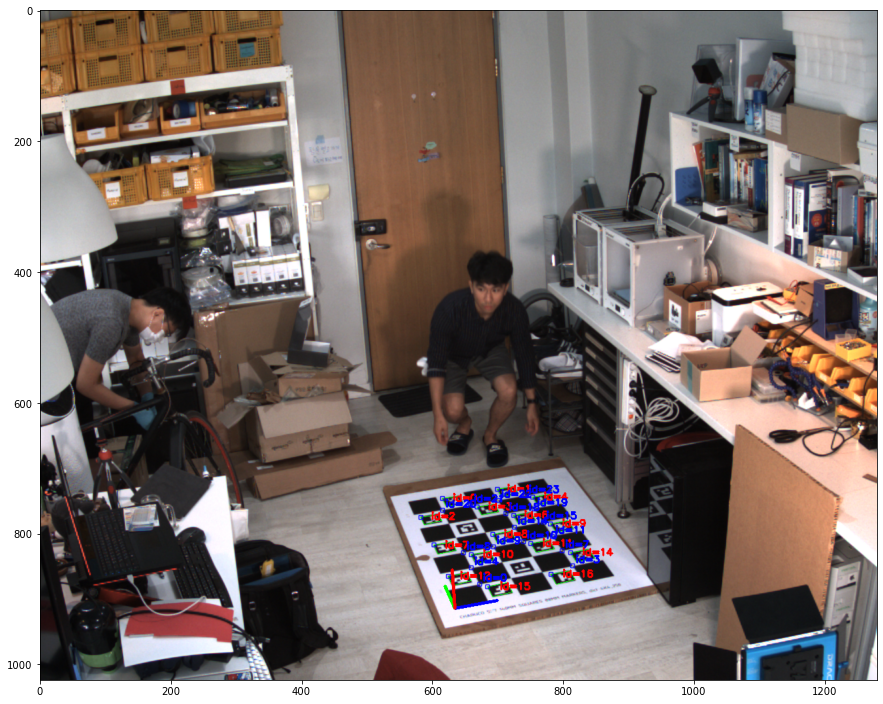

[[ 1.87633122]
 [-0.26998026]
 [ 0.09752559]]


In [237]:
#detect Charucoboad with calibration pose
image_data = r"I:\20200818_multiple\selected\000000000109_rendered.png"
frame  = cv2.imread(image_data,cv2.IMREAD_UNCHANGED)
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

markerCorners, markerIds, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
imaxis = aruco.drawDetectedMarkers(frame.copy(), markerCorners, markerIds)
retval,charucoCorners,charucoIds= cv2.aruco.interpolateCornersCharuco(markerCorners,markerIds,gray,board)
imaxis_charuco = cv2.aruco.drawDetectedCornersCharuco(imaxis,charucoCorners,charucoIds,(0,0,255))

rvecs, tvecs, _objPoints=cv2.aruco.estimatePoseSingleMarkers(	corners, markerLength, mtx, dist)
retval, rvec, tvec = cv2.aruco.estimatePoseCharucoBoard(charucoCorners, charucoIds, board, mtx, dist,rvecs,tvecs)
imaxis_final= cv2.aruco.drawAxis(imaxis_charuco,mtx, dist, rvec,tvec,length = 0.18)
plt.figure(figsize=(15,15))
plt.imshow(imaxis_charuco)
plt.show()
print(rvec)

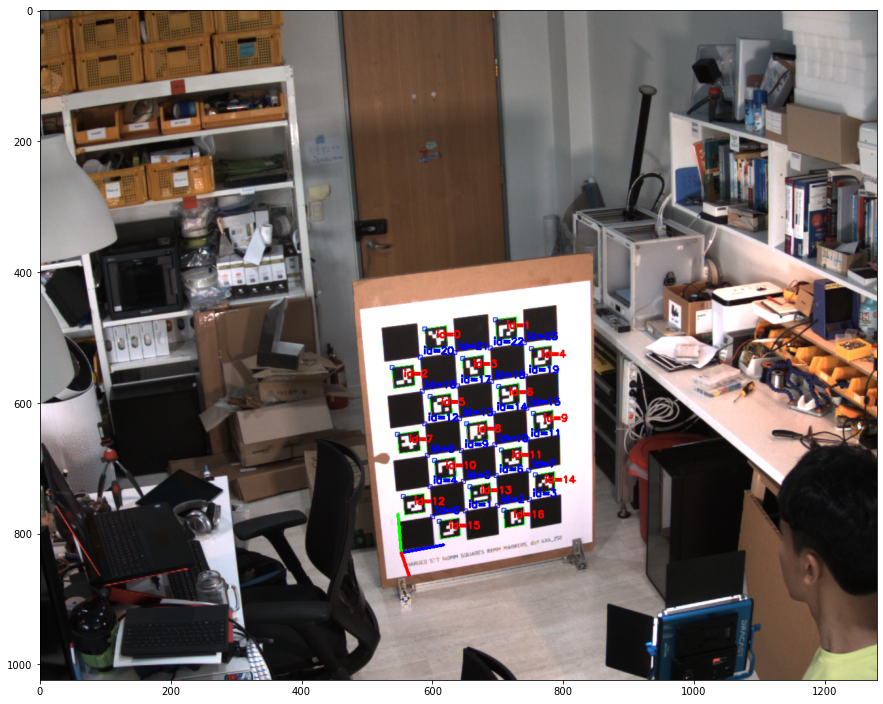

[[-2.77738641]
 [ 0.13769233]
 [-0.30353853]]


In [266]:
#detect Charucoboad with calibration pose
image_data = r"I:\20200818_ChessboardDetection\cam01\000000000015_rendered.png"
frame  = cv2.imread(image_data,cv2.IMREAD_UNCHANGED)
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

markerCorners, markerIds, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
imaxis = aruco.drawDetectedMarkers(frame.copy(), markerCorners, markerIds)
retval,charucoCorners,charucoIds= cv2.aruco.interpolateCornersCharuco(markerCorners,markerIds,gray,board)
imaxis_charuco = cv2.aruco.drawDetectedCornersCharuco(imaxis,charucoCorners,charucoIds,(0,0,255))

rvecs, tvecs, _objPoints=cv2.aruco.estimatePoseSingleMarkers(	corners, markerLength, mtx, dist)
retval, rvec, tvec = cv2.aruco.estimatePoseCharucoBoard(charucoCorners, charucoIds, board, mtx, dist,rvecs,tvecs)
imaxis_final= cv2.aruco.drawAxis(imaxis_charuco,mtx, dist, rvec,tvec,length = 0.18)
plt.figure(figsize=(15,15))
plt.imshow(imaxis_charuco)
plt.show()
print(rvec)

In [249]:
rotM = cv2.Rodrigues(rvec)
rotM[0]

array([[ 0.96977633, -0.23445581, -0.06755994],
       [-0.1371551 , -0.29481479, -0.94565994],
       [ 0.2017978 ,  0.92634481, -0.31806121]])

In [263]:
#Vector from markers
tvecs[2]-tvecs[0]
tvecs[3]-tvecs[0]

array([[-0.07059953, -0.08798983,  0.24900593]])